In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

from scripts.load_data import load_train, load_test

2022-02-22 15:44:34.352436: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-22 15:44:34.352467: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## CNN bouwen

In [2]:
# Het importeren en bewerken van de data 
train_images, train_labels = load_train(padding=((0, 0), (0, 0), (0, 0)))
test_images, test_labels = load_test(padding=((0, 0), (0, 0), (0, 0)))

# Normalizeren van de images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshapen van de images zodat ze de juiste dimensies hebben
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)
print(train_images.shape)

(60000, 28, 28, 1)


In [3]:
# Onze CNN

# Stap 1: bepaal hoeveel filters je wilt, hoe groot je filter size moet zijn (let op je filter size mag niet te groot zijn vergeleken met je images), en wat je pool size is. 
num_filters = 3
filter_size = 3
pool_size = 4

# Stap 2: maak het model.
#    In de array die je aan sequential meegeeft, zet je alle layers die in het model moeten:
#    Conv2D, parameters: num_filters, filter_size, input_shape=(x, y, z)
#    MaxPooling2D, parameters: pool_size=pool_size
#    Flatten,
#    Dense, parameters: aantal outputs, activation='softmax'

model = Sequential()
model.add(Conv2D(filters=num_filters, kernel_size=filter_size, input_shape=train_images.shape[1:]))
model.add(Conv2D(filters=num_filters, kernel_size=filter_size, input_shape=train_images.shape[1:]))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="softmax"))


2022-02-22 15:44:37.590092: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-22 15:44:37.590124: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-22 15:44:37.590147: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (delta): /proc/driver/nvidia/version does not exist
2022-02-22 15:44:37.590424: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Stap 3: het compilen van het model.
# model.compile parameters: 'adam', loss='categorial_crossentropy', metrics=['accuracy']
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Stap 4: fit het model.
#    Data om op te trainen: train_images, to_categorial(train_labels)
#    epochs = 3
#    validation_data = test_images, to_categorial(test_labels)
model.fit(train_images, to_categorical(train_labels), epochs=3)

Epoch 1/3


2022-02-22 15:44:38.118744: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


  12/1875 [..............................] - ETA: 28s - loss: 2.3011 - accuracy: 0.1328

2022-02-22 15:44:39.102087: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28180224 exceeds 10% of free system memory.
2022-02-22 15:44:39.102245: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28180224 exceeds 10% of free system memory.
2022-02-22 15:44:39.124734: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28180224 exceeds 10% of free system memory.
2022-02-22 15:44:39.124907: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28180224 exceeds 10% of free system memory.


1875/1875 [==============================] - 32s 16ms/step - loss: 0.7874 - accuracy: 0.7179
Epoch 2/3
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1955 - accuracy: 0.9399
Epoch 3/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1622 - accuracy: 0.9501


In [5]:
# Stap 5: evalueer het model
test_loss, test_acc = model.evaluate(test_images, to_categorical(test_labels), verbose=2)
print(test_acc)

313/313 - 2s - loss: 0.1356 - accuracy: 0.9576 - 2s/epoch - 7ms/step
0.9575999975204468


In [6]:
# Stap 6: extra layer(s). Wat gebeurt er als je een extra Conv Layer toevoegd aan je model? 
#    Voeg een extra layer(s) toe en train het model opnieuw.


# Stap 7: parameters. Wat gebeurt er bijvoorbeeld als je geen softmax gebruikt maar een andere activatie? 
#    Pas op z'n minst 1 parameter aan en train je model opnieuw.

# Een extra conv layer lijkt niet zo veel te doen maar een Dense relu layer maakt ~5 procent meer accurate


## CIFAR-10

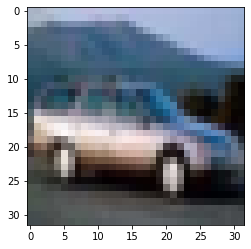

In [7]:
# Data inladen
(train_images10, train_labels10), (test_images10, test_labels10) = cifar10.load_data()

plt.imshow(train_images10[4])
plt.show()

# Normalizeren
train_images10, test_images10 = train_images10 / 255.0, test_images10 / 255.0

In [8]:
# Stap 8: bouw je eigen CNN voor de CIFAR-10 dataset. 
# Tip: gebruik meerdere Conv2D en MaxPooling layers
# LET OP: gebruik 'softmax' alleen bij je laatste Dense layer. Gebruik 'relu' voor de andere Conv2D/Dense layers.
num_filters = 32
filter_size = 3
pool_size = 4

model_cif = Sequential()
model_cif.add(Conv2D(filters=num_filters, kernel_initializer='he_uniform', padding='same', kernel_size=filter_size, input_shape=train_images10.shape[1:], activation="relu"))
model_cif.add(Conv2D(filters=num_filters, kernel_initializer='he_uniform', padding='same', kernel_size=filter_size, input_shape=train_images10.shape[1:], activation="relu"))
model_cif.add(MaxPooling2D((2,2)))
model_cif.add(Conv2D(filters=num_filters*2, kernel_initializer='he_uniform', padding='same', kernel_size=filter_size, input_shape=train_images10.shape[1:], activation="relu"))
model_cif.add(Conv2D(filters=num_filters*2, kernel_initializer='he_uniform', padding='same', kernel_size=filter_size, input_shape=train_images10.shape[1:], activation="relu"))
model_cif.add(MaxPooling2D((2,2)))
model_cif.add(Conv2D(filters=num_filters*2*2, kernel_initializer='he_uniform', padding='same', kernel_size=filter_size, input_shape=train_images10.shape[1:], activation="relu"))
model_cif.add(Conv2D(filters=num_filters*2*2, kernel_initializer='he_uniform', padding='same', kernel_size=filter_size, input_shape=train_images10.shape[1:], activation="relu"))
model_cif.add(MaxPooling2D((2,2)))

model_cif.add(Flatten())
model_cif.add(Dense(128, activation="relu", kernel_initializer='he_uniform'))
model_cif.add(Dense(10, activation="softmax"))

model_cif.compile(
    'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [9]:
model_cif.fit(
    train_images10,
    to_categorical(train_labels10),
    epochs=10,  #hint: meer dan 3,
    validation_data=(test_images10, to_categorical(test_labels10)),
)

Epoch 1/10
1019/1563 [==================>...........] - ETA: 42s - loss: 1.5228 - accuracy: 0.4441

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model_cif.evaluate(test_images10, to_categorical(test_labels10), verbose=2)

In [ ]:
print(test_acc)

## Bronnen
* https://victorzhou.com/blog/keras-cnn-tutorial/ Bezocht: 9/3/2020
* https://www.tensorflow.org/tutorials/images/cnn Bezocht: 13/3/2020